In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np

In [28]:
FIG_SAVE_BASE_PATH = "../docs/report/fig/"
DOUBLE_COL_FIG_SIZE = (15, 5)

In [29]:
stations = pd.read_csv("../project/data/dwd/stations.tsv", sep="\t")

#remove stations with empty Beginn or Ende
mask = stations["Beginn"] == " "
stations = stations[~mask]
mask = stations["Ende"] == " "
stations = stations[~mask]

stations["Beginn"] = pd.to_datetime(stations["Beginn"], dayfirst=True)
stations["Ende"] = pd.to_datetime(stations["Ende"], dayfirst=True)

stations.head()

,Stationsname,Stations_ID,Kennung,Stations-kennung,Breite,Länge,Stations-höhe,Flussgebiet,Bundesland,Beginn,Ende
0,Aach,1,KL,02783,47.8410,8.8490,478,,BW,1937-01-01,1986-06-30
1,Aach,1,RR,70191,47.8410,8.8490,478,,BW,1912-01-01,1986-06-30
2,Aach/Hegau,10771,PE,10771,47.8500,8.8500,480,,BW,1951-02-27,2000-06-15
3,Aachen,3,EB,02205,50.7827,6.0941,202,803100,NW,1951-01-01,2011-03-31
4,Aachen,3,FF,02205,50.7827,6.0941,202,803100,NW,1937-01-01,2011-03-31


In [30]:
from datetime import datetime
bw_stations = stations.loc[stations["Bundesland"] == "BW"].drop_duplicates(subset= ["Stationsname", "Stations-kennung"])

current_bw_stations = bw_stations[bw_stations["Ende"] >= datetime(day=2, month=12, year=2023)]
id_str = current_bw_stations["Stations-kennung"].to_string(index=False).replace("\n ", ",")

In [31]:
# bw_response_stations = current_bw_stations[current_bw_stations["Stations-kennung"].isin(response_ids)]
a = ["Q771",  "Q411",  "Q740",  "Q055",  "Q811",  "Q824",  "Q382",  "Q712",  "Q702",  "Q221",  "Q978",  "Q848",  "Q351",  "Q651",  "Q485",  "Q292",  "Q579",  "Q887",  "Q671",  "Q437",  "Q061",  "Q242",  "Q518",  "Q332",  "Q864",  "Q440",  "Q404",  "Q733",  "Q341",  "Q378",  "Q788",  "Q942",  "Q738",  "Q879",  "Q622",  "Q926"]
bw_response_stations = current_bw_stations[current_bw_stations["Stations-kennung"].isin(a)]

In [32]:
bw_response_stations.head()

,Stationsname,Stations_ID,Kennung,Stations-kennung,Breite,Länge,Stations-höhe,Flussgebiet,Bundesland,Beginn,Ende
399,"Altheim, Kreis Biberach",4189,MN,Q771,48.148,9.460,534,901570,BW,2003-08-05,2023-12-02
874,Baden-Baden-Geroldsau,257,MN,Q411,48.727,8.246,240,705450,BW,2002-09-08,2023-12-02
925,Balingen-Bronnhaupten,13965,MN,Q740,48.264,8.813,619,710420,BW,2008-10-29,2023-12-02
2492,"Buchen, Kr. Neckar-Odenwald",755,MN,Q055,49.518,9.321,340,740070,BW,2004-03-23,2023-12-02
2499,Buchenbach,757,MN,Q811,47.963,7.998,445,703230,BW,2003-03-25,2023-12-02


In [33]:
current_directory = os.curdir
# www.suche-postleitzahl.org/downloads 
filepath_plz = r'../data/map'   
#Create map of germany 
plz_shape_df = gpd.read_file(os.path.join(filepath_plz,'plz-5stellig.shp'), dtype={'plz': str})
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df.head()

,plz,note,einwohner,qkm,geometry
0,64743,"Situation unklar, evtl. haben die HÃ¤user Marb...",3,0.082066,"POLYGON ((8.98124 49.60761, 8.98312 49.60748, ..."
1,81248,81248 MÃ¼nchen,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39490 48.14780..."
2,60315,60315 Frankfurt am Main (FOUR),0,0.017285,"POLYGON ((8.67254 50.11264, 8.67258 50.11265, ..."
3,99331,99331 Geratal,4523,20.207080,"POLYGON ((10.79153 50.69477, 10.79178 50.69819..."
4,60312,60312 Frankfurt am Main (Omniturm),0,0.001829,"POLYGON ((8.67262 50.11164, 8.67311 50.11182, ..."


get lat lon coords of stations

In [34]:
#Create dict of the stations and their long lat
col_to_conv_to_dict = bw_response_stations[['Länge', 'Breite', 'Stationsname']]
stations_dict = col_to_conv_to_dict.set_index('Stationsname').apply(tuple, axis=1).to_dict()
tuebingen = {'Tübingen':(9.057645, 48.521637)}
stations_dict.update(tuebingen)

In [35]:

# Assuming bw_response_stations is a DataFrame containing 'Länge', 'Breite', and 'Stationsname'
# Create dict of the stations and their long lat
col_to_conv_to_dict = bw_response_stations[['Länge', 'Breite', 'Stationsname']]
stations_dict = col_to_conv_to_dict.set_index('Stationsname').apply(tuple, axis=1).to_dict()

# Add Tübingen to the dictionary
tuebingen = {'Tübingen': (9.057645, 48.521637)}
stations_dict.update(tuebingen)

# Print the updated dictionary
print(stations_dict)


{'Altheim, Kreis Biberach': (9.46, 48.148), 'Baden-Baden-Geroldsau': (8.246, 48.727), 'Balingen-Bronnhaupten': (8.813, 48.264), 'Buchen, Kr. Neckar-Odenwald': (9.321, 49.518), 'Buchenbach': (7.998, 47.963), 'Dachsberg-Wolpadingen': (8.106, 47.7), 'Ellwangen-Rindelbach': (10.131, 48.99), 'Elzach-Fisnacht': (8.109, 48.201), 'Emmendingen-Mundingen': (7.835, 48.138), 'Eppingen-Elsenz': (8.848, 49.166), 'Friedrichshafen-Unterraderach': (9.441, 47.685), 'Geisingen': (8.647, 47.924), 'Großerlach-Mannenweiler': (9.603, 49.021), 'Hechingen': (8.98, 48.375), 'Hermaringen-Allewind': (10.267, 48.61), 'Kirchberg/Jagst-Herboldshausen': (9.98, 49.18), 'Merklingen': (9.764, 48.512), 'Müllheim': (7.639, 47.806), 'Münsingen-Apfelstetten': (9.484, 48.385), 'Neubulach-Oberhaugstett': (8.68, 48.652), 'Notzingen': (9.463, 48.671), 'Obersulm-Willsbach': (9.353, 49.128), 'Ohlsbach': (7.993, 48.433), 'Pforzheim-Ispringen': (8.697, 48.933), 'Pfullendorf': (9.287, 47.935), 'Renningen-Ihinger Hof': (8.924, 48.743

In [36]:
plz_region_df = pd.read_csv(
    os.path.join(filepath_plz, 'zuordnung_plz_ort.csv'), 
    sep=',', 
    dtype={'plz': str}
)
plz_region_df.drop('osm_id', axis=1, inplace=True)

# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

bawu_df = germany_df[germany_df['bundesland']== 'Baden-Württemberg']
print(bawu_df.head())

       plz  einwohner         qkm  \
546  74744       2221   53.882924   
547  74736       6910   87.002504   
548  74749       2090   40.883933   
550  74731      11320  106.517171   
552  75399       2273    6.365145   

                                              geometry      ags  \
546  POLYGON ((9.49069 49.48888, 9.49113 49.48910, ...  8128138   
547  POLYGON ((9.38375 49.64278, 9.38408 49.64293, ...  8225032   
548  POLYGON ((9.42533 49.48844, 9.42537 49.48868, ...  8225082   
550  POLYGON ((9.25891 49.59210, 9.25902 49.59267, ...  8225109   
552  POLYGON ((8.65376 48.81218, 8.65586 48.81223, ...  8235073   

                  ort              landkreis         bundesland  
546             Ahorn      Main-Tauber-Kreis  Baden-Württemberg  
547          Hardheim  Neckar-Odenwald-Kreis  Baden-Württemberg  
548         Rosenberg  Neckar-Odenwald-Kreis  Baden-Württemberg  
550          Walldürn  Neckar-Odenwald-Kreis  Baden-Württemberg  
552  Unterreichenbach         Landkreis Calw

/tmp/ipykernel_70486/3007942821.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_color = plt.cm.get_cmap('Pastel1')
/tmp/ipykernel_70486/3007942821.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cdot_color = plt.cm.get_cmap('tab20')


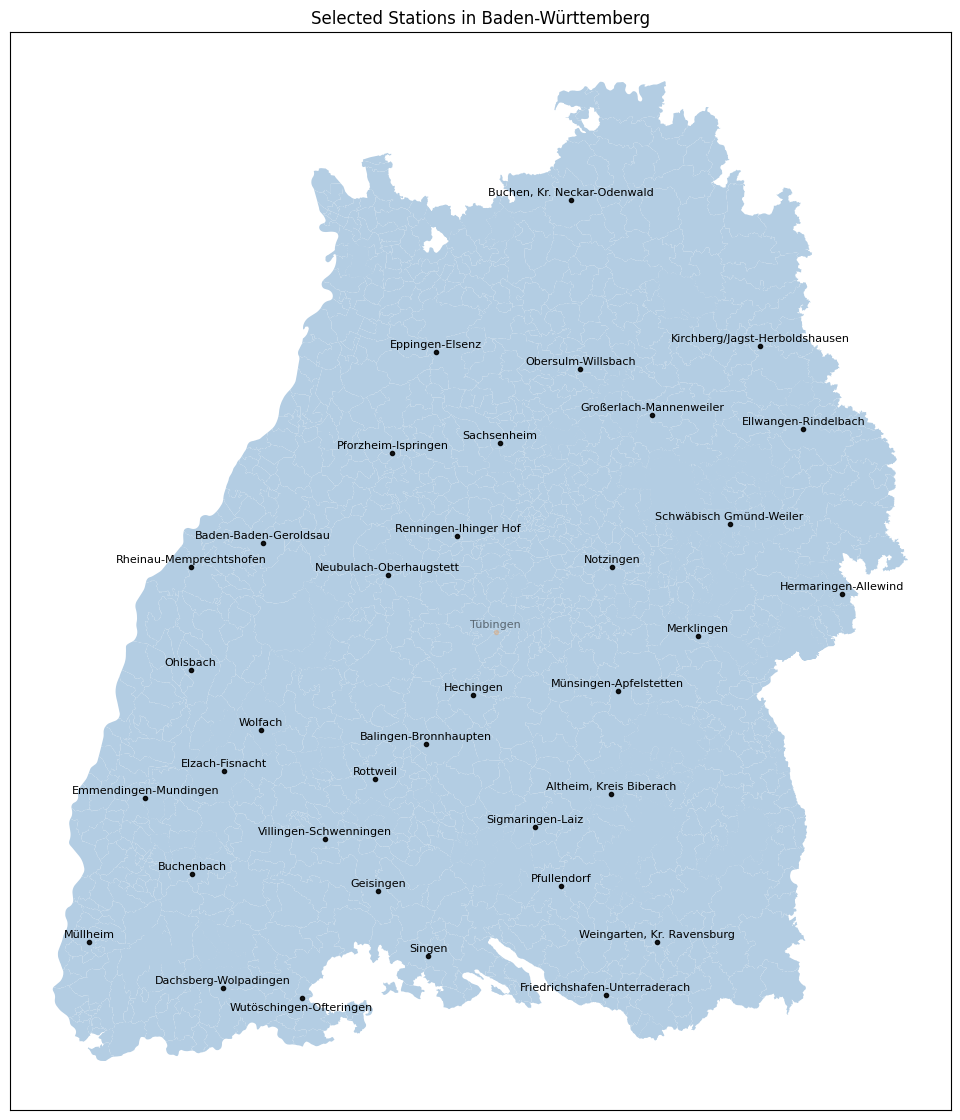

In [37]:
fig, ax = plt.subplots(figsize=(16, 14))
#Colours
cmap_color = plt.cm.get_cmap('Pastel1')
cdot_color = plt.cm.get_cmap('tab20')
stations_dict.update({'Tübingen': (9.057645, 48.521637)})
#plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)
bawu_df.plot(ax = ax,
             categorical = True,
             color= cmap_color(0.15),
             alpha = 1)
# Plot cities. 
for c in stations_dict.keys():
    # Plot city name.
    ax.text(
        x=stations_dict[c][0], 
        # Add small shift to avoid overlap with point.
        y=stations_dict[c][1] - 0.03 if c == 'Wutöschingen-Ofteringen' else stations_dict[c][1] + 0.01,
        s=c, 
        fontsize=8,
        ha='center',
        alpha = 1 if c != 'Tübingen' else 0.5 
    )
    # Plot city location centroid.
    ax.plot(
        stations_dict[c][0], 
        stations_dict[c][1], 
        marker='.',
        c='black' if c != 'Tübingen' else cdot_color(0.1), 
        alpha=0.9 if c != 'Tübingen' else 0.2, 
    )

ax.set(
    title='Selected Stations in Baden-Württemberg', 
    xticks = [],
    yticks = [],
    #aspect=1.3, 
    #xlabel = 'Longitude',
    #ylabel = 'Latitude',
)
plt.savefig('../figures/fig_bawu_map_stations_LD.pdf')

Create Heatmap so we can see for each station a normalized error rate which is defined by:
$ \frac{precipitation_{historical}- precipitation_{forecasted}}{max(precipitation_{historical}- precipitation_{forecasted})}$

In [38]:
dataset_model_1 = DWD_Dataset(source_path="../data/dwd", feature=Feature.PRECIPITATION, model=1)
dataset_model_2 = DWD_Dataset(source_path="../data/dwd", feature=Feature.PRECIPITATION, model=2)
print(dataset_model_1)

NameError: name 'DWD_Dataset' is not defined

In [ ]:
df = dataset_model_1.get_merge().groupby("station_id").mean()
df["normalized_prec_error"] = df["precipitation_error"] / max(df["precipitation_error"])
bw_response_stations.rename(columns={"Stations_ID": "station_id"}, inplace=True)

plot_stations = pd.merge(
    left=bw_response_stations,
    right=df,
    on='station_id',
    how='inner'
)

# Create dict of the stations and their long lat
col_to_conv_to_dict = plot_stations[['Länge', 'Breite', 'Stationsname', 'normalized_prec_error']].copy()
stations_dict = col_to_conv_to_dict.set_index('Stationsname').apply(lambda x: (x['Länge'], x['Breite'], x['normalized_prec_error']), axis=1).to_dict()

NameError: name 'dataset_model_1' is not defined

In [ ]:
import numpy as np

# Assume stations_dict is a dictionary with station names as keys and values as tuples (longitude, latitude, normalized_prec_error)

# Calculate distances to Tübingen
tuebingen_coords = (9.057645, 48.521637)
distances = {}

for station_name, (lon, lat, error) in stations_dict.items():
    distance = np.sqrt((lon - tuebingen_coords[0]) ** 2 + (lat - tuebingen_coords[1]) ** 2)
    distances[station_name] = distance

# Sort stations by distance
sorted_stations = sorted(distances.items(), key=lambda x: x[1])

# Plot the bar chart
fig, ax = plt.subplots(figsize=(16, 14))

# Extract station names and distances for plotting
stations, distances_sorted = zip(*sorted_stations)

# Plot bar chart
ax.bar(stations, distances_sorted, color='blue', alpha=0.7, label='Distance to Tübingen')

# Set y-axis label and legend
ax.set_ylabel('Distance to Tübingen')
ax.legend()

# Create a twin Axes sharing the yaxis for plotting errors
ax_errors = ax.twinx()

# Plot errors on the twin Axes
ax_errors.bar(stations, [stations_dict[station][2] for station in stations], color='red', alpha=0.7, label='Normalized Precipitation Error')

# Set y-axis label for errors
ax_errors.set_ylabel('Normalized Precipitation Error')
ax_errors.legend(loc='upper right')

# Set title for the entire plot
plt.title('Distance to Tübingen and Normalized Precipitation Error for Each Station')

# Show the plot
plt.show()


ValueError: not enough values to unpack (expected 3, got 2)

/tmp/ipykernel_70486/4003742304.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_color = plt.cm.get_cmap('Pastel1')
/tmp/ipykernel_70486/4003742304.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cdot_color = plt.cm.get_cmap('tab20')


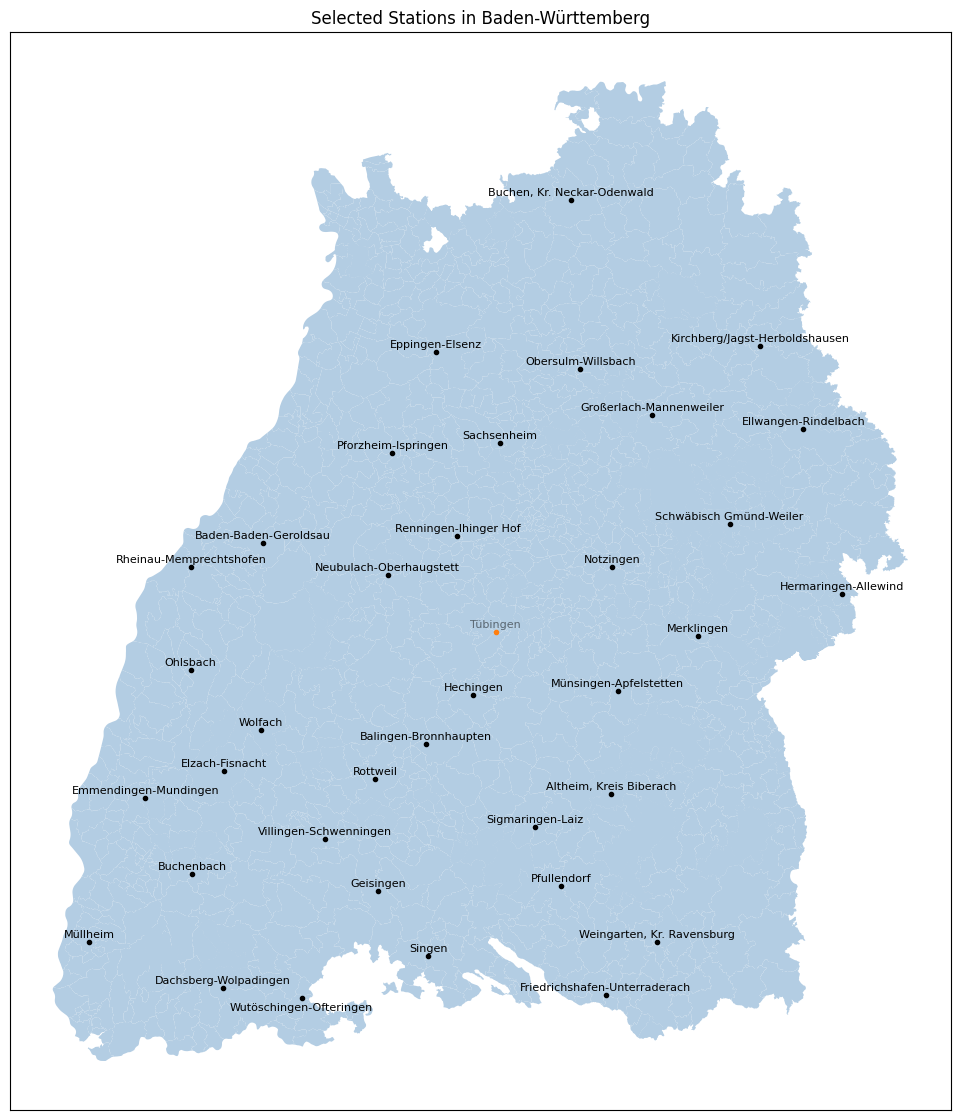

In [ ]:
if 'Tübingen' not in stations_dict:
    tuebingen = {'Tübingen': (9.057645, 48.521637, 0)}
    stations_dict.update('Tübingen')
fig, ax = plt.subplots(figsize=(16, 14))
# Colours
cmap_color = plt.cm.get_cmap('Pastel1')
cdot_color = plt.cm.get_cmap('tab20')
bawu_df.plot(ax = ax,
             categorical = True,
             color= cmap_color(0.15),
             alpha = 1)
# Plot cities.
for c in stations_dict.keys():
    # Plot city name.
    ax.text(
        x=stations_dict[c][0], 
        # Add a small shift to avoid overlap with the point.
        y=stations_dict[c][1] - 0.03 if c == 'Wutöschingen-Ofteringen' else stations_dict[c][1] + 0.01,
        s=c, 
        fontsize=8,
        ha='center',
        alpha=alpha_value if c != 'Tübingen' else 0.5 
    )
    # Plot city location centroid with normalized_prec_error as alpha.
    # Check if the third element (normalized_prec_error) is present in the tuple. Dict: 'StationID':((x,y),normalized_prec_error)
    alpha_value = 1-stations_dict[c][2] if len(stations_dict[c]) > 2 and c != 'Tübingen' else 1
    ax.plot(
        stations_dict[c][0], 
        stations_dict[c][1], 
        marker='.',
        c='black' if c != 'Tübingen' else cdot_color(0.1), 
        alpha=alpha_value, 
    )

ax.set(
    title='Selected Stations in Baden-Württemberg', 
    xticks=[],
    yticks=[],
    # aspect=1.3, 
    # xlabel='Longitude',
    # ylabel='Latitude',
)
# plt.savefig(os.path.join(FIG_SAVE_BASE_PATH, "heatmappo.pdf"))
plt.show()
